In [193]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [194]:
# Enigme 2 : Les quatre chevelures
"""
Dans cette énigme on a 4 personnes avec des cheveux teints en orange ou en indigo avec 1 chance sur 2
Ces 4 personnes sont alignées de manière à voir la couleur des cheveux des personnes devant elle mais pas derrière elle
La première peronne voit donc les 3 personnes devant elle.
La deuxième personne voit 2 personnes devant elle.
La troisième personne voit 1 personne devant elle.
La quatrième personne ne voit personne devant elle.
L'objectif est que chaque personne annonce sa couleur de cheveux "orange" ou "indigo"

A noter que personne ne voit la couleur des cheveux de la première personne, on ne pourra donc pas déterminer sa couleur de cheveux et on se trompera forcément 1 fois sur 2.
Néanmoins on va voir dans la résolution du problème qu'on pourra se servir de sa réponse correct ou non pour déduire les couleurs des autres personnes.
"""

'\nDans cette énigme on a 4 personnes avec des cheveux teints en orange ou en indigo avec 1 chance sur 2\nCes 4 personnes sont alignées de manière à voir la couleur des cheveux des personnes devant elle mais pas derrière elle\nLa première peronne voit donc les 3 personnes devant elle.\nLa deuxième personne voit 2 personnes devant elle.\nLa troisième personne voit 1 personne devant elle.\nLa quatrième personne ne voit personne devant elle.\nL\'objectif est que chaque personne annonce sa couleur de cheveux "orange" ou "indigo"\n\nA noter que personne ne voit la couleur des cheveux de la première personne, on ne pourra donc pas déterminer sa couleur de cheveux et on se trompera forcément 1 fois sur 2.\nNéanmoins on va voir dans la résolution du problème qu\'on pourra se servir de sa réponse correct ou non pour déduire les couleurs des autres personnes.\n'

In [195]:
# Résolution
"""
Afin de résoudre cette énigme, le groupe de 4 personnes élabore la stratégie suivante :
La première personne qui voit les 3 autres va indiquer :
- "indigo" si elle voit un nombre impaire de chevelure indigo
- "orange" si elle voit un nombre pair de chevelure indigo
Ainsi, les personnes suivantes pourront déduire leur couleur de cheveux par rapport aux réponses des personnes précédentes et des couleurs de cheveux devant elle

Ex:
Couleur initial
Personne1 = orange
Personne2 = orange
Personne3 = indigo
Personne4 = orange

Ce que la personne annonce
Personne1 => indigo (1 chevelure indigo, impaire)
Personne2 => orange (il sait qu'il y a un nombre impaire de couleurs indigo, sachant qu'il voit une couleur orange et indigo, la seule possibilité pour garder un nombre impaire et d'avoir sa couleur de cheveux orange)
Personne3 => indigo (il sait qu'il y a un nombre impaire de couleurs indigo et la personne derriere elle a annoncé avoir les cheveux orange, de plus la personne devant elle a les cheveux orange, il en déduit que sa couleur est indigo)
Personne4 => orange (il sait qu'il y a un nombre impaire de couleurs indigo et les couleurs précédente sont orange et indigo, le seul moyen de garder un nombre impare et d'avoir les cheveux orange)

=> on a obtenu 3 bonnes réponse sur 4
"""

'\nAfin de résoudre cette énigme, le groupe de 4 personnes élabore la stratégie suivante :\nLa première personne qui voit les 3 autres va indiquer :\n- "indigo" si elle voit un nombre impaire de chevelure indigo\n- "orange" si elle voit un nombre pair de chevelure indigo\nAinsi, les personnes suivantes pourront déduire leur couleur de cheveux par rapport aux réponses des personnes précédentes et des couleurs de cheveux devant elle\n\nEx:\nCouleur initial\nPersonne1 = orange\nPersonne2 = orange\nPersonne3 = indigo\nPersonne4 = orange\n\nCe que la personne annonce\nPersonne1 => indigo (1 chevelure indigo, impaire)\nPersonne2 => orange (il sait qu\'il y a un nombre impaire de couleurs indigo, sachant qu\'il voit une couleur orange et indigo, la seule possibilité pour garder un nombre impaire et d\'avoir sa couleur de cheveux orange)\nPersonne3 => indigo (il sait qu\'il y a un nombre impaire de couleurs indigo et la personne derriere elle a annoncé avoir les cheveux orange, de plus la pers

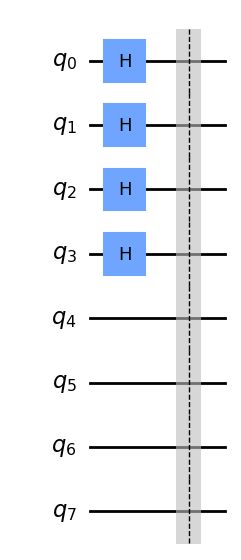

In [196]:
# Implémentation de l'énigme
# On commence par définir les couleurs de cheveux des 4 personnes avec 4 qubits en état de superposition (0 ou 1)
# On définit 0 pour la couleur orange et 1 pour la couleur indigo
# On va aussi modéliser la réponse des 4 personnes avec 4 autres qubits
# On aura donc besoin d'un total de 8 qubits dans notre circuit quantique
circ = QuantumCircuit(8)
circ.h([0,1,2,3])
circ.barrier()
circ.draw('mpl')

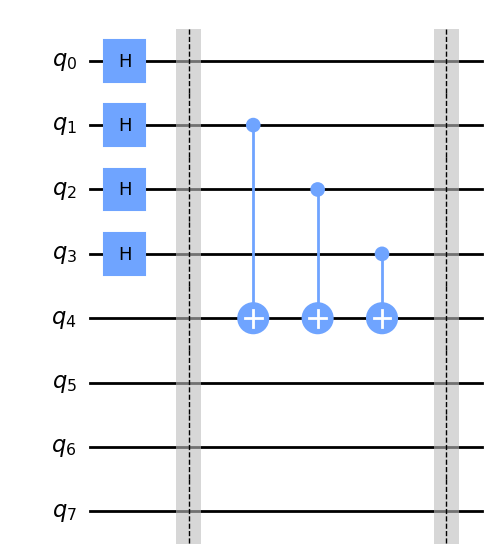

In [197]:
# La première personne (q0) observe les personnes devant elle (q1, q2 et q3)
# On veut obtenir en sorti de q4, 1 si on a un nombre impaire de couleur indigo et 0 sinon
# La porte CNOT répond à cette problèmatique, en effet, on veut inverser la valeur du qubit à chaque fois qu'on observe un indigo (valeur 1)
circ.cx(1,4)
circ.cx(2,4)
circ.cx(3,4)
circ.barrier()
circ.draw('mpl')

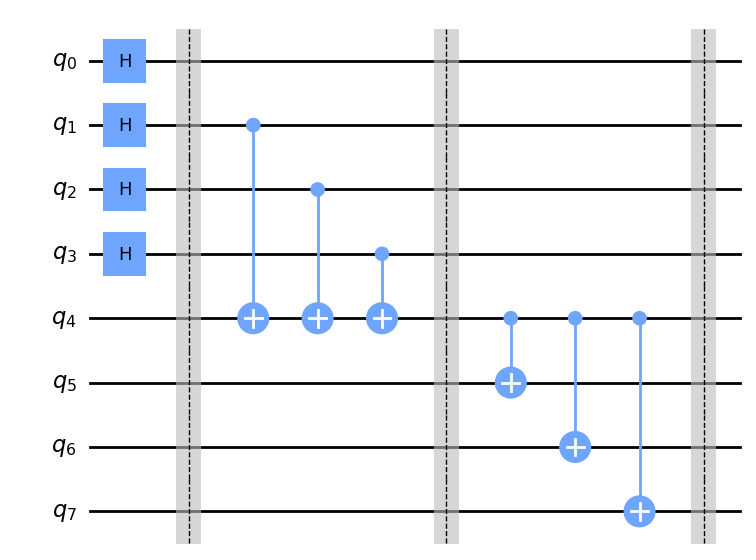

In [198]:
# Chaque personne devant elle a accès à la réponse de la personne1 q4
# Les réponses q5, q6 et q7 sont donc initialisées avec la réponse de q4 à l'aide de la porte CNOT
circ.cx(4,5)
circ.cx(4,6)
circ.cx(4,7)
circ.barrier()
circ.draw('mpl')

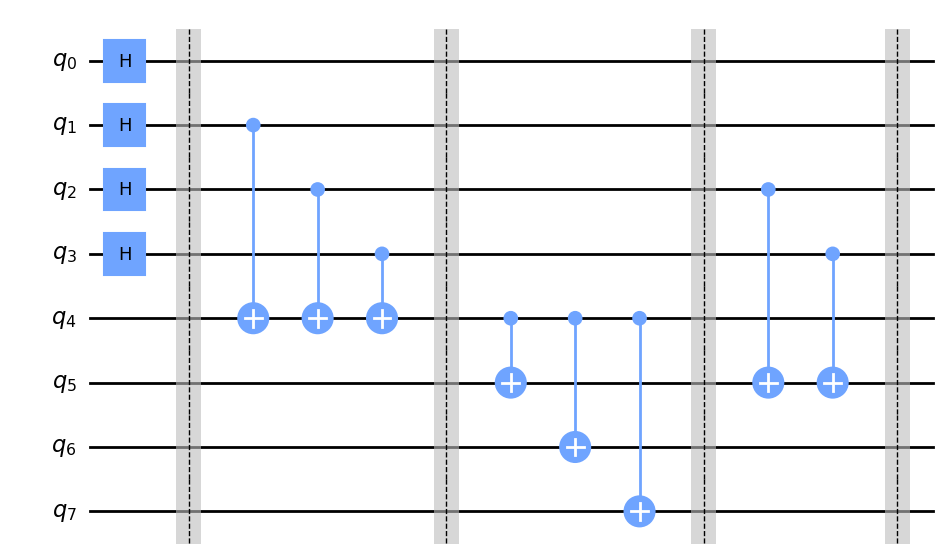

In [199]:
# La deuxième personne qui correspond à la réponse q5 a accès aussi à l'information sur la couleur des cheveux de la troisième (q2) et quatrième (q3) personne
# On va donc modifier la réponse q5 à partir des observations q2 et q3 en utilisant une porte CNOT pour inverer la réponse à chaque fois qu'on observe la couleur indigo
circ.cx(2,5)
circ.cx(3,5)
circ.barrier()
circ.draw('mpl')

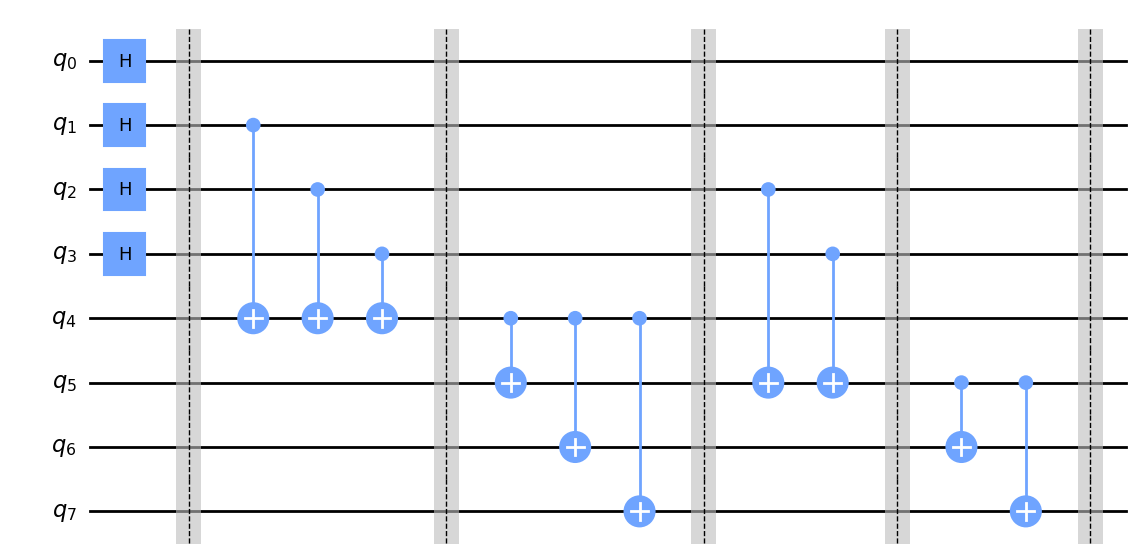

In [200]:
# On répète le même processus pour les personnes suivantes
# q6 et q7 récupère la réponse de q5
circ.cx(5,6)
circ.cx(5,7)
circ.barrier()
circ.draw('mpl')

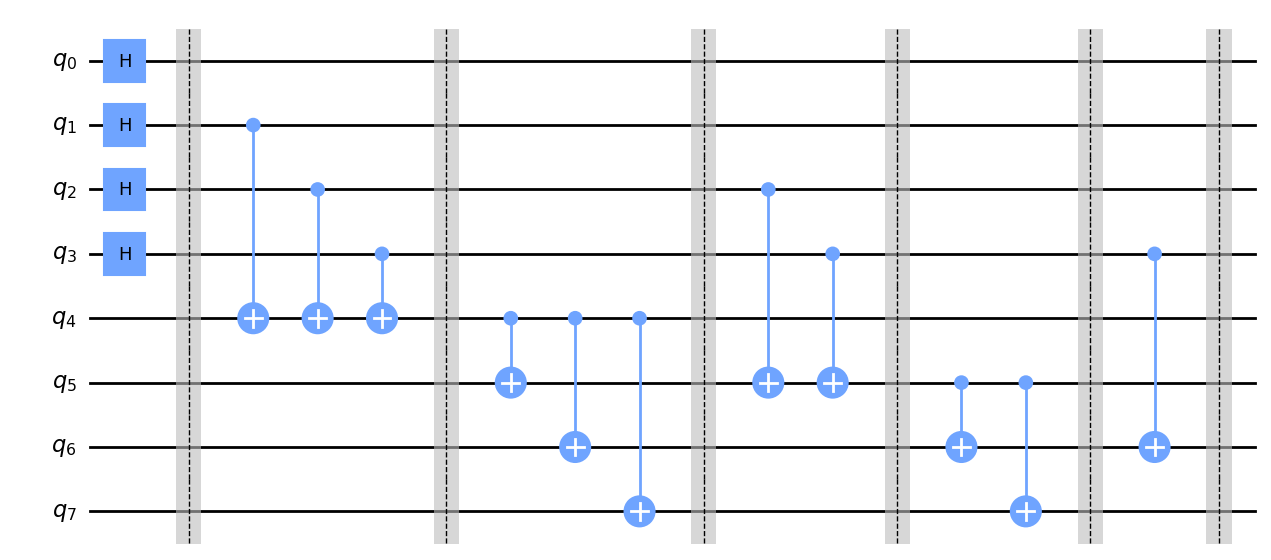

In [201]:
# q6 observe la couleur q3
circ.cx(3,6)
circ.barrier()
circ.draw('mpl')

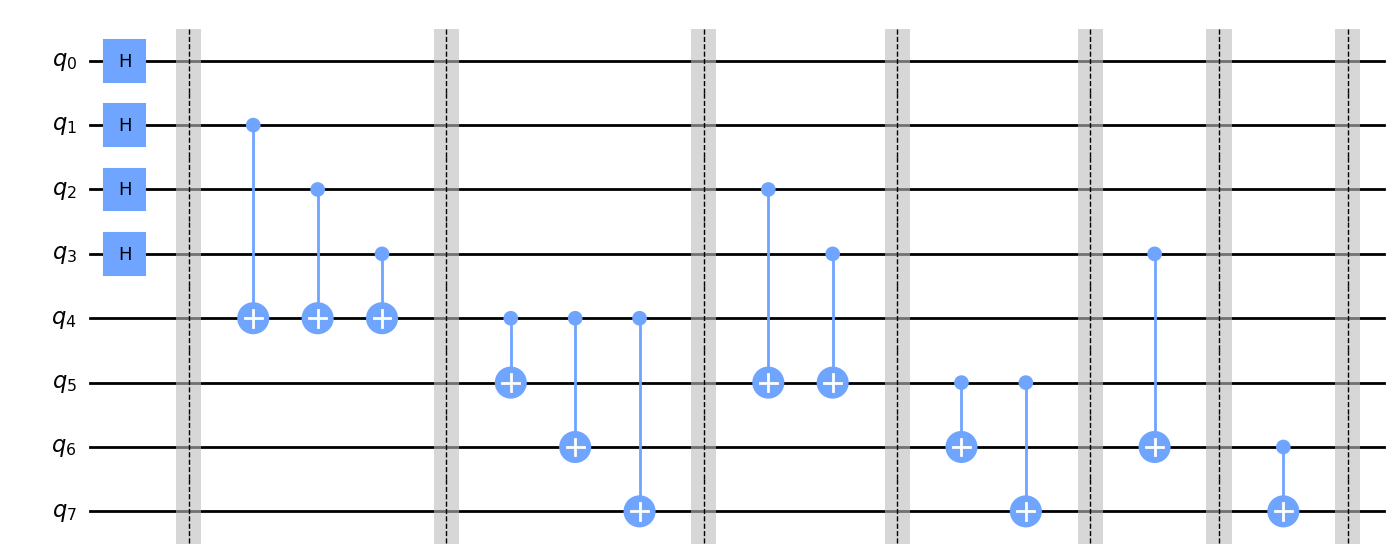

In [202]:
# q7 récupère la réponse de q6 et déduit sa couleur de cheveux (aucune autre personne devant elle)
circ.cx(6,7)
circ.barrier()
circ.draw('mpl')

In [203]:
circ.measure_all()
# circ.measure([])
nbr_mesure = 100000

backend = Aer.get_backend('qasm_simulator')
job = backend.run(circ)
result = backend.run(transpile(circ, backend), shots=nbr_mesure).result()
counts  = result.get_counts(circ)

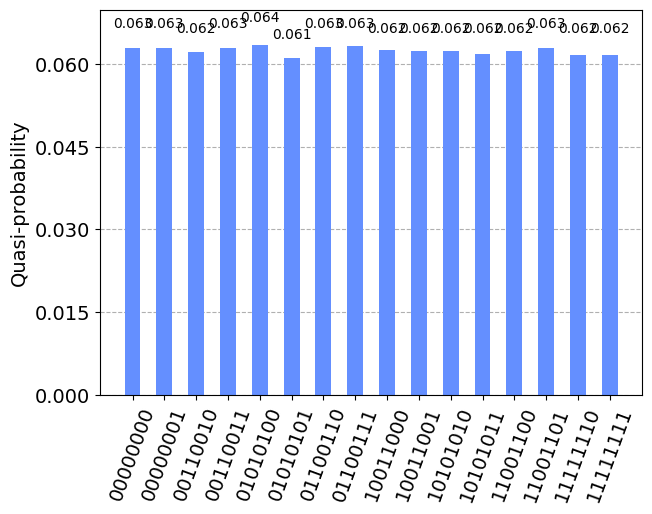

In [204]:
# print(counts)
for key in counts.keys():
    counts[key] = (counts[key])/nbr_mesure

plot_histogram(counts)

In [205]:
"""
Interpretation des résultats:

Nous avons 4 personnes avec chacune 2 possibilités de couleurs de cheveux de chance équiprobable ce qui donne 2^4 = 16 possibilités
Pour chaque possibilité on aura toujours les mêmes réponse associé
=> On obtient un total de 16 possibilités équiprobables avec 1/16 * 100 = 6.25% de chance pour chaque possibilité

On retrouve les résultats théoriques avec l'approche expérimentale.
On a bien 16 possibilités pour les 4 premiers qubits (q0, q1, q2 et q3) avec une possibilité unique pour les qubits q4, q5, q6, et q7 sachant les qubits q0, q1, q2 et q3
En effectuant 100.000 simulations on retrouve bien la probabilité 6.25% pour chacun des cas
"""

"\nInterpretation des résultats:\n\nNous avons 4 personnes avec chacune 2 possibilités de couleurs de cheveux de chance équiprobable ce qui donne 2^4 = 16 possibilités\nPour chaque possibilité on aura toujours les mêmes réponse associé\n=> On obtient un total de 16 possibilités équiprobables avec 1/16 * 100 = 6.25% de chance pour chaque possibilité\n\nOn retrouve les résultats théoriques avec l'approche expérimentale.\nOn a bien 16 possibilités pour les 4 premiers qubits (q0, q1, q2 et q3) avec une possibilité unique pour les qubits q4, q5, q6, et q7 sachant les qubits q0, q1, q2 et q3\nEn effectuant 100.000 simulations on retrouve bien la probabilité 6.25% pour chacun des cas\n"